# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [3]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [4]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [5]:
# Split data into training (80%) and testing (20%) sets
from sklearn.model_selection import train_test_split

# Separate features and target
X = data.drop('MEDV', axis=1)
y = data['MEDV']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"Test set size: {len(X_test)} samples ({len(X_test)/len(X)*100:.1f}%)")
print(f"Number of features: {X_train.shape[1]}")

Training set size: 404 samples (79.8%)
Test set size: 102 samples (20.2%)
Number of features: 13


## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [6]:
# Train LinearRegression model and generate predictions
from sklearn.linear_model import LinearRegression

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Generate predictions
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

print("Linear Regression model trained successfully!")
print(f"Model coefficients shape: {lr_model.coef_.shape}")

Linear Regression model trained successfully!
Model coefficients shape: (13,)


## 3. Calculate and print R-squared for both the training and the testing set.

In [7]:
# Calculate and print R-squared for both sets
from sklearn.metrics import r2_score

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("R-squared (R²) Scores:")
print("=" * 50)
print(f"Training set R²:   {r2_train:.4f}")
print(f"Testing set R²:    {r2_test:.4f}")
print(f"\nInterpretation: The model explains {r2_test*100:.2f}% of variance in test data")

R-squared (R²) Scores:
Training set R²:   0.7509
Testing set R²:    0.6688

Interpretation: The model explains 66.88% of variance in test data


## 4. Calculate and print mean squared error for both the training and the testing set.

In [8]:
# Calculate and print Mean Squared Error for both sets
from sklearn.metrics import mean_squared_error
import numpy as np

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

print("Mean Squared Error (MSE):")
print("=" * 50)
print(f"Training set MSE:   {mse_train:.4f}")
print(f"Testing set MSE:    {mse_test:.4f}")
print(f"\nRoot Mean Squared Error (RMSE):")
print(f"Training set RMSE:  {rmse_train:.4f}")
print(f"Testing set RMSE:   {rmse_test:.4f}")
print(f"\nInterpretation: On average, predictions are off by ${rmse_test:.2f}k")

Mean Squared Error (MSE):
Training set MSE:   21.6414
Testing set MSE:    24.2911

Root Mean Squared Error (RMSE):
Training set RMSE:  4.6520
Testing set RMSE:   4.9286

Interpretation: On average, predictions are off by $4.93k


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [9]:
# Calculate and print Mean Absolute Error for both sets
from sklearn.metrics import mean_absolute_error

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print("Mean Absolute Error (MAE):")
print("=" * 50)
print(f"Training set MAE:   {mae_train:.4f}")
print(f"Testing set MAE:    {mae_test:.4f}")
print(f"\nInterpretation: Predictions have an average absolute error of ${mae_test:.2f}k")

# Summary of all regression metrics
print("\n" + "=" * 70)
print("REGRESSION MODEL EVALUATION SUMMARY")
print("=" * 70)
print(f"{'Metric':<20} {'Training':<15} {'Testing':<15}")
print("-" * 70)
print(f"{'R² Score':<20} {r2_train:<15.4f} {r2_test:<15.4f}")
print(f"{'MSE':<20} {mse_train:<15.4f} {mse_test:<15.4f}")
print(f"{'RMSE':<20} {rmse_train:<15.4f} {rmse_test:<15.4f}")
print(f"{'MAE':<20} {mae_train:<15.4f} {mae_test:<15.4f}")

Mean Absolute Error (MAE):
Training set MAE:   3.3148
Testing set MAE:    3.1891

Interpretation: Predictions have an average absolute error of $3.19k

REGRESSION MODEL EVALUATION SUMMARY
Metric               Training        Testing        
----------------------------------------------------------------------
R² Score             0.7509          0.6688         
MSE                  21.6414         24.2911        
RMSE                 4.6520          4.9286         
MAE                  3.3148          3.1891         


## Classification Model Evaluation

In [10]:
from sklearn.datasets import load_iris
data = load_iris()

In [11]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [12]:
column_names = data.feature_names

In [13]:
df = pd.DataFrame(data['data'],columns=column_names)

In [14]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
target = pd.DataFrame(data.target)

In [16]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [17]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [18]:
# Split iris data into training (80%) and testing (20%) sets
X_iris = df
y_iris = target[0]  # Extract the target series

X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    X_iris, y_iris, test_size=0.2, random_state=42, stratify=y_iris
)

print(f"Training set size: {len(X_train_iris)} samples ({len(X_train_iris)/len(X_iris)*100:.1f}%)")
print(f"Test set size: {len(X_test_iris)} samples ({len(X_test_iris)/len(X_iris)*100:.1f}%)")
print(f"\nTarget distribution in training:")
print(y_train_iris.value_counts().sort_index())
print(f"\nTarget distribution in test:")
print(y_test_iris.value_counts().sort_index())

Training set size: 120 samples (80.0%)
Test set size: 30 samples (20.0%)

Target distribution in training:
0
0    40
1    40
2    40
Name: count, dtype: int64

Target distribution in test:
0
0    10
1    10
2    10
Name: count, dtype: int64


## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [19]:
# Train LogisticRegression model and generate predictions
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
log_reg = LogisticRegression(random_state=42, max_iter=200)
log_reg.fit(X_train_iris, y_train_iris)

# Generate predictions
y_train_iris_pred = log_reg.predict(X_train_iris)
y_test_iris_pred = log_reg.predict(X_test_iris)

print("Logistic Regression model trained successfully!")
print(f"Classes: {log_reg.classes_}")

Logistic Regression model trained successfully!
Classes: [0 1 2]


## 8. Calculate and print the accuracy score for both the training and the testing set.

In [20]:
# Calculate and print accuracy score
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_train_iris, y_train_iris_pred)
acc_test = accuracy_score(y_test_iris, y_test_iris_pred)

print("Accuracy Scores:")
print("=" * 50)
print(f"Training set accuracy:   {acc_train:.4f} ({acc_train*100:.2f}%)")
print(f"Testing set accuracy:    {acc_test:.4f} ({acc_test*100:.2f}%)")

Accuracy Scores:
Training set accuracy:   0.9750 (97.50%)
Testing set accuracy:    0.9667 (96.67%)


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [21]:
# Calculate and print balanced accuracy score
from sklearn.metrics import balanced_accuracy_score

bal_acc_train = balanced_accuracy_score(y_train_iris, y_train_iris_pred)
bal_acc_test = balanced_accuracy_score(y_test_iris, y_test_iris_pred)

print("Balanced Accuracy Scores:")
print("=" * 50)
print(f"Training set:   {bal_acc_train:.4f} ({bal_acc_train*100:.2f}%)")
print(f"Testing set:    {bal_acc_test:.4f} ({bal_acc_test*100:.2f}%)")
print("\nBalanced accuracy adjusts for class imbalance")

Balanced Accuracy Scores:
Training set:   0.9750 (97.50%)
Testing set:    0.9667 (96.67%)

Balanced accuracy adjusts for class imbalance


## 10. Calculate and print the precision score for both the training and the testing set.

In [22]:
# Calculate and print precision score
from sklearn.metrics import precision_score

prec_train = precision_score(y_train_iris, y_train_iris_pred, average='weighted')
prec_test = precision_score(y_test_iris, y_test_iris_pred, average='weighted')

print("Precision Scores (weighted average):")
print("=" * 50)
print(f"Training set:   {prec_train:.4f}")
print(f"Testing set:    {prec_test:.4f}")
print("\nPrecision = TP / (TP + FP) - How many positive predictions were correct")

Precision Scores (weighted average):
Training set:   0.9752
Testing set:    0.9697

Precision = TP / (TP + FP) - How many positive predictions were correct


## 11. Calculate and print the recall score for both the training and the testing set.

In [23]:
# Calculate and print recall score
from sklearn.metrics import recall_score

rec_train = recall_score(y_train_iris, y_train_iris_pred, average='weighted')
rec_test = recall_score(y_test_iris, y_test_iris_pred, average='weighted')

print("Recall Scores (weighted average):")
print("=" * 50)
print(f"Training set:   {rec_train:.4f}")
print(f"Testing set:    {rec_test:.4f}")
print("\nRecall = TP / (TP + FN) - How many actual positives were correctly identified")

Recall Scores (weighted average):
Training set:   0.9750
Testing set:    0.9667

Recall = TP / (TP + FN) - How many actual positives were correctly identified


## 12. Calculate and print the F1 score for both the training and the testing set.

In [24]:
# Calculate and print F1 score
from sklearn.metrics import f1_score

f1_train = f1_score(y_train_iris, y_train_iris_pred, average='weighted')
f1_test = f1_score(y_test_iris, y_test_iris_pred, average='weighted')

print("F1 Scores (weighted average):")
print("=" * 50)
print(f"Training set:   {f1_train:.4f}")
print(f"Testing set:    {f1_test:.4f}")
print("\nF1 Score = 2 * (Precision * Recall) / (Precision + Recall)")
print("Harmonic mean of precision and recall")

F1 Scores (weighted average):
Training set:   0.9750
Testing set:    0.9666

F1 Score = 2 * (Precision * Recall) / (Precision + Recall)
Harmonic mean of precision and recall


## 13. Generate confusion matrices for both the training and the testing set.

Confusion Matrix - Training Set:
[[40  0  0]
 [ 0 38  2]
 [ 0  1 39]]

Confusion Matrix - Testing Set:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


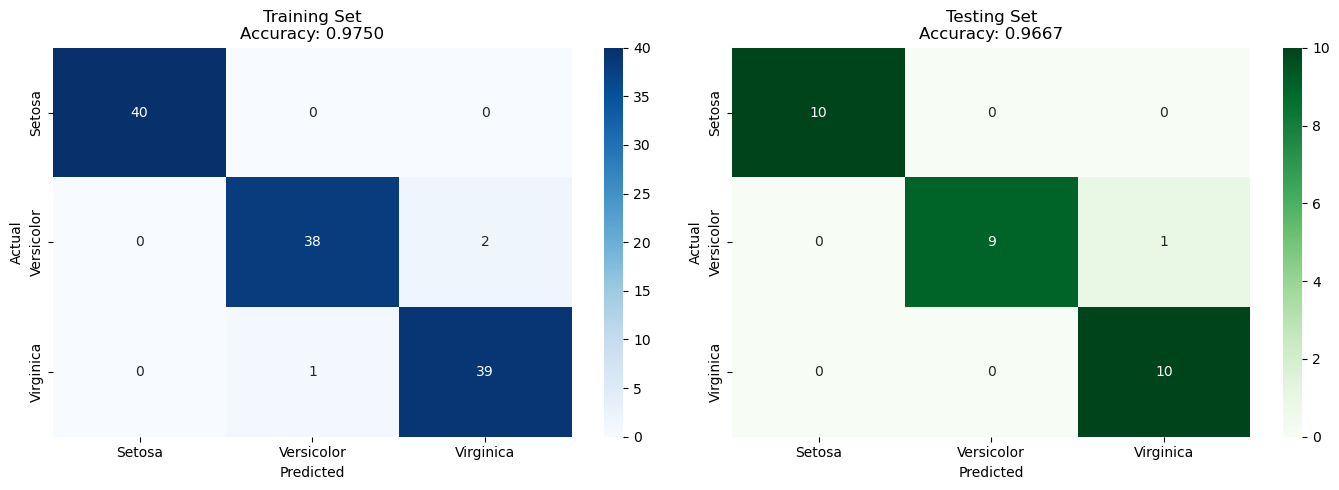


Classification Report - Testing Set:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      0.90      0.95        10
   Virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


CLASSIFICATION MODEL EVALUATION SUMMARY
Metric                    Training        Testing        
----------------------------------------------------------------------
Accuracy                  0.9750          0.9667         
Balanced Accuracy         0.9750          0.9667         
Precision (weighted)      0.9752          0.9697         
Recall (weighted)         0.9750          0.9667         
F1 Score (weighted)       0.9750          0.9666         


In [25]:
# Generate confusion matrices
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_train = confusion_matrix(y_train_iris, y_train_iris_pred)
cm_test = confusion_matrix(y_test_iris, y_test_iris_pred)

print("Confusion Matrix - Training Set:")
print(cm_train)
print("\nConfusion Matrix - Testing Set:")
print(cm_test)

# Visualize confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Setosa', 'Versicolor', 'Virginica'],
            yticklabels=['Setosa', 'Versicolor', 'Virginica'])
axes[0].set_title(f'Training Set\nAccuracy: {acc_train:.4f}')
axes[0].set_ylabel('Actual')
axes[0].set_xlabel('Predicted')

sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=['Setosa', 'Versicolor', 'Virginica'],
            yticklabels=['Setosa', 'Versicolor', 'Virginica'])
axes[1].set_title(f'Testing Set\nAccuracy: {acc_test:.4f}')
axes[1].set_ylabel('Actual')
axes[1].set_xlabel('Predicted')

plt.tight_layout()
plt.show()

# Classification report
from sklearn.metrics import classification_report
print("\nClassification Report - Testing Set:")
print("=" * 70)
print(classification_report(y_test_iris, y_test_iris_pred, 
                           target_names=['Setosa', 'Versicolor', 'Virginica']))

# Summary table
print("\n" + "=" * 70)
print("CLASSIFICATION MODEL EVALUATION SUMMARY")
print("=" * 70)
print(f"{'Metric':<25} {'Training':<15} {'Testing':<15}")
print("-" * 70)
print(f"{'Accuracy':<25} {acc_train:<15.4f} {acc_test:<15.4f}")
print(f"{'Balanced Accuracy':<25} {bal_acc_train:<15.4f} {bal_acc_test:<15.4f}")
print(f"{'Precision (weighted)':<25} {prec_train:<15.4f} {prec_test:<15.4f}")
print(f"{'Recall (weighted)':<25} {rec_train:<15.4f} {rec_test:<15.4f}")
print(f"{'F1 Score (weighted)':<25} {f1_train:<15.4f} {f1_test:<15.4f}")

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [26]:
# Bonus: Try other models on both datasets

print("BONUS: Comparing Multiple Models")
print("=" * 70)

# For Regression (Boston Housing)
print("\n1. REGRESSION MODELS (Boston Housing)")
print("-" * 70)

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

models_reg = {
    'Linear Regression': lr_model,
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42, n_estimators=100)
}

results_reg = []
for name, model in models_reg.items():
    if name != 'Linear Regression':  # Already trained
        model.fit(X_train, y_train)
    
    y_pred_test = model.predict(X_test)
    r2 = r2_score(y_test, y_pred_test)
    mse = mean_squared_error(y_test, y_pred_test)
    mae = mean_absolute_error(y_test, y_pred_test)
    
    results_reg.append({
        'Model': name,
        'R²': r2,
        'MSE': mse,
        'MAE': mae
    })

results_reg_df = pd.DataFrame(results_reg).sort_values('R²', ascending=False)
print("\n", results_reg_df.to_string(index=False))

# For Classification (Iris)
print("\n\n2. CLASSIFICATION MODELS (Iris)")
print("-" * 70)

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

models_clf = {
    'Logistic Regression': log_reg,
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'KNN (k=5)': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=100)
}

results_clf = []
for name, model in models_clf.items():
    if name != 'Logistic Regression':  # Already trained
        model.fit(X_train_iris, y_train_iris)
    
    y_pred_test = model.predict(X_test_iris)
    acc = accuracy_score(y_test_iris, y_pred_test)
    prec = precision_score(y_test_iris, y_pred_test, average='weighted')
    rec = recall_score(y_test_iris, y_pred_test, average='weighted')
    f1 = f1_score(y_test_iris, y_pred_test, average='weighted')
    
    results_clf.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1
    })

results_clf_df = pd.DataFrame(results_clf).sort_values('Accuracy', ascending=False)
print("\n", results_clf_df.to_string(index=False))

print("\n" + "=" * 70)
print("CONCLUSIONS:")
print("-" * 70)
print("Regression: Best model based on highest R² score")
print(f"  → {results_reg_df.iloc[0]['Model']} (R² = {results_reg_df.iloc[0]['R²']:.4f})")
print("\nClassification: Best model based on highest accuracy")
print(f"  → {results_clf_df.iloc[0]['Model']} (Accuracy = {results_clf_df.iloc[0]['Accuracy']:.4f})")

BONUS: Comparing Multiple Models

1. REGRESSION MODELS (Boston Housing)
----------------------------------------------------------------------

             Model       R²       MSE      MAE
Gradient Boosting 0.915334  6.208861 1.912243
    Random Forest 0.892253  7.901514 2.039539
    Decision Tree 0.857963 10.416078 2.394118
Linear Regression 0.668759 24.291119 3.189092


2. CLASSIFICATION MODELS (Iris)
----------------------------------------------------------------------

               Model  Accuracy  Precision   Recall  F1 Score
          KNN (k=5)  1.000000   1.000000 1.000000  1.000000
Logistic Regression  0.966667   0.969697 0.966667  0.966583
  Gradient Boosting  0.966667   0.969697 0.966667  0.966583
                SVM  0.966667   0.969697 0.966667  0.966583
      Decision Tree  0.933333   0.933333 0.933333  0.933333
      Random Forest  0.900000   0.902357 0.900000  0.899749

CONCLUSIONS:
----------------------------------------------------------------------
Regression: B